## 1. The dataset
<p>Walt Disney Studios is the foundation on which The Walt Disney Company was built. The Studios has produced more than 600 films since their debut film,  Snow White and the Seven Dwarfs in 1937. While many of its films were big hits, some of them were not. In this notebook, we will explore a dataset of Disney movies and analyze what contributes to the success of Disney movies.</p>
<p><img src="https://assets.datacamp.com/production/project_740/img/jorge-martinez-instagram-jmartinezz9-431078-unsplash_edited.jpg" alt></p>
<p>First, we will take a look at the Disney data compiled by <a href="https://data.world/kgarrett/disney-character-success-00-16">Kelly Garrett</a>. The data contains 579 Disney movies with six features: movie title, release date, genre, MPAA rating, total gross, and inflation-adjusted gross. </p>
<p>Let's load the file and see what the data looks like.</p>

In [1]:
# Import pandas library
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
# Read the file into gross
gross = pd.read_csv('datasets/disney_movies_total_gross.csv',parse_dates = ['release_date'])

# Print out gross
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
movie_title                 579 non-null object
release_date                579 non-null datetime64[ns]
genre                       562 non-null object
mpaa_rating                 523 non-null object
total_gross                 579 non-null int64
inflation_adjusted_gross    579 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 27.2+ KB


## 2. Top ten movies at the box office
<p>Let's started by exploring the data. We will check which are the 10 Disney movies that have earned the most at the box office. We can do this by sorting movies by their inflation-adjusted gross (we will call it adjusted gross from this point onward). </p>

In [2]:
# Sort data by the adjusted gross in descending order 
# ... YOUR CODE FOR TASK 2 ...
gross = gross.sort_values(by = ['inflation_adjusted_gross'],ascending = False)
# Display the top 10 movies 
# ... YOUR CODE FOR TASK 2 ...
gross.head(10)


,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898


## 3. Movie genre trend
<p>From the top 10 movies above, it seems that some genres are more popular than others. So, we will check which genres are growing stronger in popularity. To do this, we will group movies by genre and then by year to see the adjusted gross of each genre in each year.</p>

In [3]:
 # Extract year from release_date and store it in a new column
gross['release_year'] = gross['release_date'].dt.year

# Compute mean of adjusted gross per genre and per year
group = gross.groupby(['genre','release_year']).mean()

# Convert the GroupBy object to a DataFrame
genre_yearly = group.reset_index()

# Inspect genre_yearly 
genre_yearly.head(10)

,genre,release_year,total_gross,inflation_adjusted_gross
0,Action,1981,0.0,0.0
1,Action,1982,26918576.0,77184895.0
2,Action,1988,17577696.0,36053517.0
3,Action,1990,59249588.5,118358772.0
4,Action,1991,28924936.5,57918572.5
5,Action,1992,29028000.0,58965304.0
6,Action,1993,21943553.5,44682157.0
7,Action,1994,19180582.0,39545796.0
8,Action,1995,63037553.5,122162426.5
9,Action,1996,135281096.0,257755262.5


## 4. Visualize the genre popularity trend
<p>We will make a plot out of these means of groups to better see how box office revenues have changed over time.</p>

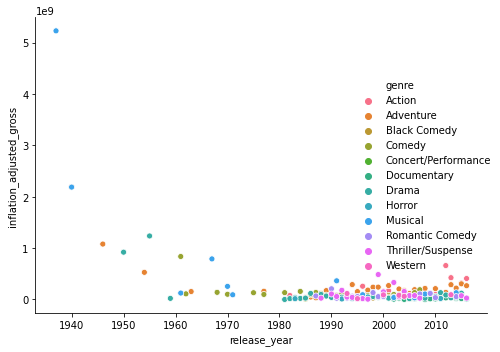

In [4]:
# Import seaborn library
# ... YOUR CODE FOR TASK 4 ...
import seaborn as sns

# Plot the data  
# ... YOUR CODE FOR TASK 4 ...
sns.relplot (data  = genre_yearly, x='release_year', y = 'inflation_adjusted_gross',hue = 'genre')

## 5. Data transformation
<p>The line plot supports our belief that some genres are growing faster in popularity than others. For Disney movies, Action and Adventure genres are growing the fastest. Next, we will build a linear regression model to understand the relationship between genre and box office gross. </p>
<p>Since linear regression requires numerical variables and the genre variable is a categorical variable, we'll use a technique called one-hot encoding to convert the categorical variables to numerical. This technique transforms each category value into a new column and assigns a 1 or 0 to the column. </p>
<p>For this dataset, there will be 11 dummy variables, one for each genre except the action genre which we will use as a baseline. For example, if a movie is an adventure movie, like The Lion King, the adventure variable will be 1 and other dummy variables will be 0. Since the action genre is our baseline, if a movie is an action movie, such as The Avengers, all dummy variables will be 0.</p>

In [8]:
# Convert genre variable to dummy variables 
genre_dummies = pd.get_dummies(data=gross['genre'], drop_first=True)

# Inspect genre_dummies
genre_dummies.head()

,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western
0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0


## 6. The genre effect
<p>Now that we have dummy variables, we can build a linear regression model to predict the adjusted gross using these dummy variables.</p>
<p>From the regression model, we can check the effect of each genre by looking at its coefficient given in units of box office gross dollars. We will focus on the impact of action and adventure genres here. (Note that the intercept and the first coefficient values represent the effect of action and adventure genres respectively). We expect that movies like the Lion King or Star Wars would perform better for box office.</p>

In [9]:
# Import LinearRegression
# ... YOUR CODE FOR TASK 6 ...
from sklearn.linear_model import LinearRegression
# Build a linear regression model
regr = LinearRegression()

# Fit regr to the dataset
# ... YOUR CODE FOR TASK 6 ...
regr.fit(genre_dummies, gross['inflation_adjusted_gross'])
# Get estimated intercept and coefficient values 
action =  regr.intercept_
adventure = regr.coef_[[0]][0]

# Inspect the estimated intercept and coefficient values 
print((action, adventure))

(102921757.36841978, 87475654.70909972)


## 7. Confidence intervals for regression parameters  (i)
<p>Next, we will compute 95% confidence intervals for the intercept and coefficients. The 95% confidence intervals for the intercept  <b><i>a</i></b> and coefficient <b><i>b<sub>i</sub></i></b> means that the intervals have a probability of 95% to contain the true value <b><i>a</i></b> and coefficient <b><i>b<sub>i</sub></i></b> respectively. If there is a significant relationship between a given genre and the adjusted gross, the confidence interval of its coefficient should exclude 0.      </p>
<p>We will calculate the confidence intervals using the pairs bootstrap method. </p>

In [11]:
# Import a module
import numpy as np

# Create an array of indices to sample from 
inds = np.arange(len(gross['genre']))

# Initialize 500 replicate arrays
size = 500
bs_action_reps =  np.empty(size)
bs_adventure_reps =  np.empty(size)

## 8. Confidence intervals for regression parameters  (ii)
<p>After the initialization, we will perform pair bootstrap estimates for the regression parameters. Note that we will draw a sample from a set of (genre, adjusted gross) data where the genre is the original genre variable. We will perform one-hot encoding after that. </p>

In [12]:
# Generate replicates  
for i in range(size):
    
    # Resample the indices 
    bs_inds = np.random.choice(inds, size=len(inds))
    
    # Get the sampled genre and sampled adjusted gross
    bs_genre = gross['genre'][bs_inds] 
    bs_gross = gross['inflation_adjusted_gross'][bs_inds]
    
    # Convert sampled genre to dummy variables
    bs_dummies = pd.get_dummies(bs_genre, drop_first=True)
   
    # Build and fit a regression model 
    regr = LinearRegression().fit(bs_dummies, bs_gross)
    
    # Compute replicates of estimated intercept and coefficient
    bs_action_reps[i] = regr.intercept_
    bs_adventure_reps[i] = regr.coef_[[0]][0]

## 9. Confidence intervals for regression parameters (iii)
<p>Finally, we compute 95% confidence intervals for the intercept and coefficient and examine if they exclude 0. If one of them (or both) does, then it is unlikely that the value is 0 and we can conclude that there is a significant relationship between that genre and the adjusted gross. </p>

In [13]:
# Compute 95% confidence intervals for intercept and coefficient values
confidence_interval_action = np.percentile(bs_action_reps, [2.5, 97.5])
confidence_interval_adventure = np.percentile(bs_adventure_reps, [2.5, 97.5])
    
# Inspect the confidence intervals
print(confidence_interval_action)
print(confidence_interval_adventure)

[7.32795714e+07 1.38066154e+08]
[2.94420153e+07 1.41729737e+08]


## 10. Should Disney make more action and adventure movies?
<p>The confidence intervals from the bootstrap method for the intercept and coefficient do not contain the value zero, as we have already seen that lower and upper bounds of both confidence intervals are positive. These tell us that it is likely that the adjusted gross is significantly correlated with the action and adventure genres. </p>
<p>From the results of the bootstrap analysis and the trend plot we have done earlier, we could say that Disney movies with plots that fit into the action and adventure genre, according to our data, tend to do better in terms of adjusted gross than other genres. So we could expect more Marvel, Star Wars, and live-action movies in the upcoming years!</p>

In [14]:
# should Disney studios make more action and adventure movies? 
more_action_adventure_movies = True